In [1]:
import copy
import matplotlib.patches as patches
import Metrica_Viz as mviz
import Metrica_IO as mio
import numpy as np
import pandas as pd
from preprocessing import PreProcessing
from cmap import Colormap
from imblearn.over_sampling import SMOTE, RandomOverSampler
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans, KMeans, SpectralClustering
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## You'll see the data goes from 0 to 1 on each axis. The coordiante (0,0) is the top left, (1,1) is the bottom right, and (0.5,0.5) is the kick off point.

In [2]:
game_1_pre = PreProcessing(data_home="data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv", 
                           data_away="data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv")
game_1_data = game_1_pre.load_and_process_data()

In [3]:
game_2_pre = PreProcessing(data_home="data/Sample_Game_2/Sample_Game_2_RawTrackingData_Home_Team.csv", 
                           data_away="data/Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv")
game_2_data = game_2_pre.load_and_process_data()

In [4]:
game_1_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.45472,0.38709
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.49645,0.40656
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.53716,0.42556
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55236,0.43313,0.50034,0.94391,0.43644,0.05038,0.37756,0.27473,0.55346,0.42231
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.55202,0.43311,0.50017,0.94434,0.43580,0.04977,0.37663,0.27543,0.55512,0.40570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70574,1,70574,2822.96,0.01778,0.53494,NaN,NaN,0.27756,0.65976,0.25373,...,0.42717,0.78415,0.51516,0.76263,0.29943,0.46791,0.26227,0.66922,0.16653,0.90563
70575,1,70575,2823.00,0.01749,0.53456,NaN,NaN,0.27759,0.65985,0.25381,...,0.42774,0.78591,0.51511,0.76364,0.29967,0.46871,0.26259,0.66986,0.16704,0.90591
70576,1,70576,2823.04,0.01721,0.53417,NaN,NaN,0.27763,0.65984,0.25392,...,0.42830,0.78765,0.51507,0.76462,0.29991,0.46948,0.26293,0.67046,0.16755,0.90617
70577,1,70577,2823.08,0.01692,0.53375,NaN,NaN,0.27765,0.65980,0.25402,...,0.42887,0.78942,0.51504,0.76561,0.30016,0.47032,0.26325,0.67102,0.16807,0.90643


In [5]:
game_2_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
51,1,51,2.04,0.94791,0.48986,0.64787,0.27031,0.67763,0.42630,0.68143,...,0.43295,0.37750,0.49511,0.02246,0.50216,0.50376,0.49565,0.36179,0.50216,0.50376
52,1,52,2.08,0.94779,0.49005,0.64797,0.27005,0.67765,0.42629,0.68101,...,0.43299,0.37743,0.49508,0.02249,0.50214,0.50371,0.49580,0.36160,0.50040,0.50384
53,1,53,2.12,0.94766,0.49025,0.64805,0.26978,0.67767,0.42637,0.68060,...,0.43305,0.37735,0.49507,0.02242,0.50209,0.50366,0.49587,0.36151,0.49770,0.50397
54,1,54,2.16,0.94756,0.49039,0.64815,0.26943,0.67769,0.42634,0.68020,...,0.43311,0.37727,0.49505,0.02235,0.50203,0.50361,0.49598,0.36131,0.49500,0.50410
55,1,55,2.20,0.94746,0.49049,0.64826,0.26908,0.67770,0.42630,0.67978,...,0.43317,0.37719,0.49505,0.02218,0.50195,0.50356,0.49605,0.36121,0.49230,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67853,1,67853,2714.12,0.90287,0.64323,0.50464,0.58939,0.52868,0.71467,0.55447,...,0.42682,0.56888,0.36177,0.37021,0.53603,0.86863,0.46103,0.54963,0.00161,0.50354
67854,1,67854,2714.16,0.90178,0.64435,0.50473,0.59095,0.52857,0.71567,0.55441,...,0.42686,0.56960,0.36142,0.37082,0.53588,0.86944,0.46106,0.55049,0.00341,0.49632
67855,1,67855,2714.20,0.90070,0.64545,0.50482,0.59251,0.52846,0.71667,0.55435,...,0.42689,0.57027,0.36106,0.37152,0.53572,0.87025,0.46110,0.55129,0.00522,0.48911
67856,1,67856,2714.24,0.89961,0.64660,0.50492,0.59407,0.52836,0.71766,0.55428,...,0.42693,0.57099,0.36071,0.37223,0.53556,0.87106,0.46114,0.55210,0.00702,0.48190


## Tracking for individual Players for the First Period

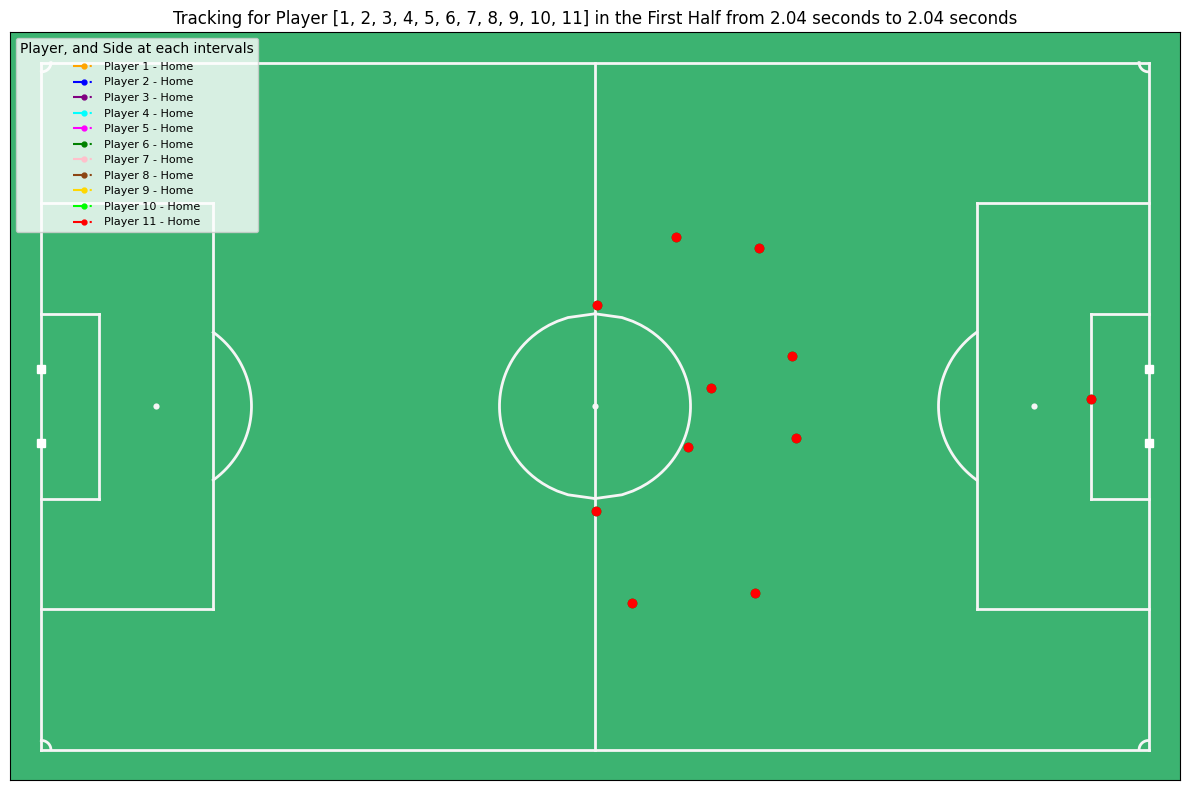

In [6]:
game_2_pre.player_tracking(game_2_data.iloc[:1], players=[1,2,3,4,5,6,7,8,9,10,11], sides=["Home"]*11, plot_ball=False)

In [7]:
# player_tracking(period_1_data)
# player_tracking(period_1_data_home, [2])
# player_tracking(period_1_data_home, [5])
# player_tracking(period_1_data_home, [8])

# Grouping players time interval on 1 second interval

In [8]:
game_1_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.45472,0.38709
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.49645,0.40656
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.53716,0.42556
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55236,0.43313,0.50034,0.94391,0.43644,0.05038,0.37756,0.27473,0.55346,0.42231
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.55202,0.43311,0.50017,0.94434,0.43580,0.04977,0.37663,0.27543,0.55512,0.40570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70574,1,70574,2822.96,0.01778,0.53494,NaN,NaN,0.27756,0.65976,0.25373,...,0.42717,0.78415,0.51516,0.76263,0.29943,0.46791,0.26227,0.66922,0.16653,0.90563
70575,1,70575,2823.00,0.01749,0.53456,NaN,NaN,0.27759,0.65985,0.25381,...,0.42774,0.78591,0.51511,0.76364,0.29967,0.46871,0.26259,0.66986,0.16704,0.90591
70576,1,70576,2823.04,0.01721,0.53417,NaN,NaN,0.27763,0.65984,0.25392,...,0.42830,0.78765,0.51507,0.76462,0.29991,0.46948,0.26293,0.67046,0.16755,0.90617
70577,1,70577,2823.08,0.01692,0.53375,NaN,NaN,0.27765,0.65980,0.25402,...,0.42887,0.78942,0.51504,0.76561,0.30016,0.47032,0.26325,0.67102,0.16807,0.90643


In [9]:
def vel_acc(dataset: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the velocity and acceleration of players and ball in a given dataset.
    
    Parameters:
    dataset (pandas.DataFrame): The input dataset containing player and ball positions over time.
    
    Returns:
    pandas.DataFrame: The original dataset with additional columns for velocity and acceleration.
    """
    temp_data = copy.deepcopy(dataset)
    star_idx = temp_data.columns.get_loc("Time[s]")
    player_columns = temp_data.columns[star_idx + 1:]

    for i in range(0, player_columns.shape[0] - 1, 2):
        # Calculate Euclidean distance between consecutive points
        ply_x, ply_y = player_columns[i], player_columns[i + 1]

        x_diff = temp_data[ply_x].diff()
        y_diff = temp_data[ply_y].diff()
        
        # Calculate time difference between frames
        time_diff = temp_data['Time[s]'].diff()
        
        # Calculate velocity (distance travelled / time)
        vx = x_diff / time_diff
        vy = y_diff / time_diff
        velocity = np.sqrt(vx**2 + vy**2)
        
        # Calculate acceleration (change in velocity / time)
        ax = vx.diff() / time_diff
        ay = vy.diff() / time_diff
        acceleration = np.sqrt(ax**2 + ay**2)
        
        if "ball" in ply_x:
            temp_data[f"ball_velocity"] = velocity
            temp_data[f"ball_acceleration"] = acceleration
        else:
            players_num = ply_x[7]
            if len(ply_x) == 11:
                players_num = ply_x[7:9]
                
            temp_data[f"P_{players_num}_velocity"] = velocity
            temp_data[f"P_{players_num}_acceleration"] = acceleration
    
    return temp_data

In [10]:
def get_frames(dataset: pd.DataFrame, players: list[int], frame: int, frame_interval: int = 5000) -> pd.DataFrame:
    start_range = dataset.index[0] if frame - frame_interval < dataset.index[0] else frame - frame_interval
    end_range = dataset.index[-1] if frame + frame_interval + 1 > dataset.index[-1] else frame + frame_interval + 1
    
    index = pd.RangeIndex(start=start_range, stop=end_range, step=1)
    temp_data = pd.DataFrame(index=index)
    # temp_data["Time[s]"] = dataset["Time[s]"]

    for i in players:
        if int(i[2:]) < 15:
            # The index is the same as frames
            temp_data[f"Home-{i}-x"] = dataset.loc[start_range:end_range, f"Home-{i}-x"]
            temp_data[f"Home-{i}-y"] = dataset.loc[start_range:end_range, f"Home-{i}-y"]
        else:
            # The index is the same as frames
            temp_data[f"Away-{i}-x"] = dataset.loc[start_range:end_range, f"Away-{i}-x"]
            temp_data[f"Away-{i}-y"] = dataset.loc[start_range:end_range, f"Away-{i}-y"]
        
        temp_data[f"{i}_velocity"] = dataset.loc[start_range:end_range, f"{i}_velocity"]
        temp_data[f"{i}_acceleration"] = dataset.loc[start_range:end_range, f"{i}_acceleration"]
        
    return temp_data

# Tracking players closest to the ball using frames

In [11]:
vel_acc_game_1_data = vel_acc(game_1_data)
vel_acc_game_2_data = vel_acc(game_2_data)

In [12]:
vel_acc_game_1_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,P_21_velocity,P_21_acceleration,P_22_velocity,P_22_acceleration,P_23_velocity,P_23_acceleration,P_24_velocity,P_24_acceleration,ball_velocity,ball_acceleration
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.151215,NaN
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.123138,0.701923
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.011138,0.278458,0.019121,0.478033,0.015201,0.380019,0.029611,0.740275,0.415521,20.643085
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.008515,0.333366,0.011560,0.190804,0.022103,0.613456,0.029100,0.160078,0.417319,12.387292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70574,1,70574,2822.96,0.01778,0.53494,NaN,NaN,0.27756,0.65976,0.25373,...,0.047202,0.025769,0.025031,0.008839,0.022150,0.013975,0.016325,0.025769,0.014427,0.008839
70575,1,70575,2823.00,0.01749,0.53456,NaN,NaN,0.27759,0.65985,0.25381,...,0.046250,0.025000,0.025281,0.006250,0.020881,0.031869,0.017889,0.039528,0.014545,0.006250
70576,1,70576,2823.04,0.01721,0.53417,NaN,NaN,0.27763,0.65984,0.25392,...,0.045697,0.013975,0.024520,0.019764,0.020163,0.018750,0.017241,0.027951,0.014311,0.012500
70577,1,70577,2823.08,0.01692,0.53375,NaN,NaN,0.27765,0.65980,0.25402,...,0.046488,0.019764,0.024761,0.008839,0.021910,0.044194,0.016125,0.027951,0.014534,0.006250


In [13]:
vel_acc_game_2_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,P_21_velocity,P_21_acceleration,P_22_velocity,P_22_acceleration,P_23_velocity,P_23_acceleration,P_24_velocity,P_24_acceleration,ball_velocity,ball_acceleration
51,1,51,2.04,0.94791,0.48986,0.64787,0.27031,0.67763,0.42630,0.68143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,1,52,2.08,0.94779,0.49005,0.64797,0.27005,0.67765,0.42629,0.68101,...,0.002016,NaN,0.001061,NaN,0.001346,NaN,0.006052,NaN,0.044045,NaN
53,1,53,2.12,0.94766,0.49025,0.64805,0.26978,0.67767,0.42637,0.68060,...,0.002500,1.397542e-02,0.001768,6.373774e-02,0.001768,1.875000e-02,0.002850,0.080039,0.067578,5.883305e-01
54,1,54,2.16,0.94756,0.49039,0.64815,0.26943,0.67769,0.42634,0.68020,...,0.002500,3.469447e-14,0.001820,6.250000e-03,0.001953,6.250000e-03,0.005706,0.073154,0.067578,6.938894e-14
55,1,55,2.20,0.94746,0.49049,0.64826,0.26908,0.67770,0.42630,0.67978,...,0.002500,3.469447e-14,0.004250,6.373774e-02,0.002358,1.250000e-02,0.003052,0.067315,0.067567,6.250000e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67853,1,67853,2714.12,0.90287,0.64323,0.50464,0.58939,0.52868,0.71467,0.55447,...,0.017794,3.750000e-02,0.020918,6.250000e-03,0.020594,8.838835e-03,0.021274,0.038017,0.064010,1.769026e+00
67854,1,67854,2714.16,0.90178,0.64435,0.50473,0.59095,0.52857,0.71567,0.55441,...,0.018028,8.838835e-03,0.017582,9.375000e-02,0.020594,0.000000e+00,0.021513,0.008839,0.186025,3.052004e+00
67855,1,67855,2714.20,0.90070,0.64545,0.50482,0.59251,0.52846,0.71667,0.55435,...,0.016767,3.186887e-02,0.019679,5.659616e-02,0.020641,6.250000e-03,0.020025,0.038017,0.185843,8.838835e-03
67856,1,67856,2714.24,0.89961,0.64660,0.50492,0.59407,0.52836,0.71766,0.55428,...,0.018028,3.186887e-02,0.019790,8.838835e-03,0.020641,6.938894e-14,0.020275,0.006250,0.185782,6.250000e-03


In [14]:
game_1_ply_tra = vel_acc_game_1_data.loc[:70578, "Home-P_1-x":]
game_2_ply_tra = vel_acc_game_2_data.loc[:67852, "Home-P_1-x":]

In [15]:
game_1_players, game_1_vel_acc = game_1_ply_tra.loc[:,"Home-P_1-x":"Away-P_24-y"], game_1_ply_tra.loc[:,"P_1_velocity":]
game_2_players, game_2_vel_acc = game_2_ply_tra.loc[:,"Home-P_1-x":"Away-P_24-y"], game_2_ply_tra.loc[:,"P_1_velocity":]

In [16]:
game_1_player_data = get_frames(game_1_ply_tra, players=game_1_pre.player_names, frame=2000, frame_interval=2000).fillna(0)
game_2_player_data = get_frames(game_2_ply_tra, players=game_2_pre.player_names, frame=2000, frame_interval=2000).fillna(0)

In [17]:
game_2_player_data

,Home-P_1-x,Home-P_1-y,P_1_velocity,P_1_acceleration,Home-P_2-x,Home-P_2-y,P_2_velocity,P_2_acceleration,Home-P_3-x,Home-P_3-y,...,P_22_velocity,P_22_acceleration,Away-P_23-x,Away-P_23-y,P_23_velocity,P_23_acceleration,Away-P_24-x,Away-P_24-y,P_24_velocity,P_24_acceleration
51,0.94791,0.48986,0.000000,0.000000,0.64787,0.27031,0.000000,0.000000,0.67763,0.42630,...,0.000000,0.000000,0.50216,0.50376,0.000000,0.000000e+00,0.49565,0.36179,0.000000,0.000000e+00
52,0.94779,0.49005,0.005618,0.000000,0.64797,0.27005,0.006964,0.000000,0.67765,0.42629,...,0.001061,0.000000,0.50214,0.50371,0.001346,0.000000e+00,0.49580,0.36160,0.006052,0.000000e+00
53,0.94766,0.49025,0.005963,0.008839,0.64805,0.26978,0.007040,0.013975,0.67767,0.42637,...,0.001768,0.063738,0.50209,0.50366,0.001768,1.875000e-02,0.49587,0.36151,0.002850,8.003905e-02
54,0.94756,0.49039,0.004301,0.041926,0.64815,0.26943,0.009100,0.051539,0.67769,0.42634,...,0.001820,0.006250,0.50203,0.50361,0.001953,6.250000e-03,0.49598,0.36131,0.005706,7.315437e-02
55,0.94746,0.49049,0.003536,0.025000,0.64826,0.26908,0.009172,0.006250,0.67770,0.42630,...,0.004250,0.063738,0.50195,0.50356,0.002358,1.250000e-02,0.49605,0.36121,0.003052,6.731456e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,0.79273,0.53951,0.001118,0.033657,0.27344,0.23456,0.027501,0.006250,0.44257,0.44640,...,0.001458,0.008839,0.39383,0.41392,0.012068,2.482791e-13,0.38791,0.64458,0.015133,6.250000e-03
3997,0.79267,0.53951,0.001500,0.017678,0.27344,0.23346,0.027500,0.006250,0.44258,0.44686,...,0.002016,0.013975,0.39371,0.41439,0.012127,6.250000e-03,0.38783,0.64518,0.015133,7.757919e-14
3998,0.79260,0.53951,0.001750,0.006250,0.27344,0.23236,0.027500,0.000000,0.44259,0.44732,...,0.002151,0.006250,0.39360,0.41486,0.012068,6.250000e-03,0.38773,0.64573,0.013975,3.365728e-02
3999,0.79253,0.53946,0.002151,0.031250,0.27346,0.23135,0.025255,0.057622,0.44260,0.44778,...,0.002305,0.045501,0.39348,0.41535,0.012612,1.397542e-02,0.38764,0.64629,0.014180,8.838835e-03


# Classification

In [18]:
def change_player_name(data: pd.Series) -> pd.Series:
    result = []
    name = ""
    for i in range(len(data)):
        item = data.iloc[i]
        if len(item) == 8:
            if int(item[-2:]) < 12:
                name = f"Home-P_{item[-2:]}"
            else:
                name = f"Away-P_{item[-2:]}"
        else:
            name = f"Home-P_{item[-1:]}"
            
        result.append(name)

    return pd.Series(data=result, name=data.name)

In [19]:
game_1_event_data = pd.read_csv("data/Sample_Game_1/Sample_Game_1_RawEventsData.csv")
game_2_event_data = pd.read_csv("data/Sample_Game_2/Sample_Game_2_RawEventsData.csv")

game_1_event_data = game_1_event_data[game_1_event_data["Period"] == 1]
game_2_event_data = game_2_event_data[game_2_event_data["Period"] == 1]

In [20]:
game_1_event_data = game_1_event_data[["Type", "Start Frame", "End Frame", "From", "To"]]
game_1_event_data["Current Player"] = change_player_name(game_1_event_data["To"].combine_first(game_1_event_data["From"]))

game_2_event_data = game_2_event_data[["Type", "Start Frame", "End Frame", "From", "To"]]
game_2_event_data["Current Player"] = change_player_name(game_2_event_data["To"].combine_first(game_2_event_data["From"]))

In [33]:
start_frames = np.array(game_1_event_data["Start Frame"].iloc[1:])
end_frames = np.array(game_1_event_data["End Frame"].iloc[1:])

assert start_frames.shape == end_frames.shape
frame_ranges = [np.sort(np.array([i, j])) for i, j in zip(end_frames, start_frames)]

game_1_event = pd.DataFrame(columns=["Type", "From", "To"])
end = game_1_player_data.index[-1] + 1
for i, f in enumerate(frame_ranges):
    e = f[1] if end > f[1] else end
    for j in range(f[0], e):
        game_1_event.loc[j, "Type"] =  game_1_event_data.loc[i + 1, "Type"]
        game_1_event.loc[j, "From"] =  game_1_event_data.loc[i + 1, "From"]
        game_1_event.loc[j, "To"] =  game_1_event_data.loc[i + 1, "To"]
        
game_1_event = game_1_event.fillna("")

In [34]:
start_frames = np.array(game_2_event_data["Start Frame"].iloc[1:])
end_frames = np.array(game_2_event_data["End Frame"].iloc[1:])

assert start_frames.shape == end_frames.shape
frame_ranges = [np.sort(np.array([i, j])) for i, j in zip(end_frames, start_frames)]

game_2_event = pd.DataFrame(columns=["Type", "From", "To"])
end = game_2_player_data.index[-1] + 1
for i, f in enumerate(frame_ranges):
    e = f[1] if end > f[1] else end
    for j in range(f[0], e):
        game_2_event.loc[j, "Type"] =  game_2_event_data.loc[i + 1, "Type"]
        game_2_event.loc[j, "From"] =  game_2_event_data.loc[i + 1, "From"]
        game_2_event.loc[j, "To"] =  game_2_event_data.loc[i + 1, "To"]

game_2_event = game_2_event.fillna("")

In [35]:
game_1_event.value_counts(dropna=False)

Type       From      To      
PASS       Player22  Player17    83
BALL LOST  Player2               74
PASS       Player20  Player22    72
           Player6   Player10    64
           Player17  Player25    64
BALL LOST  Player17              56
BALL OUT   Player15              51
PASS       Player19  Player21    49
BALL LOST  Player10              44
           Player16              44
PASS       Player10  Player8     40
           Player2   Player9     38
           Player21  Player22    26
           Player10  Player9     26
           Player21  Player20    25
           Player16  Player19    21
           Player9   Player10    20
           Player5   Player6     20
           Player19  Player20    20
SHOT       Player9               20
PASS       Player15  Player19    16
           Player21  Player15    14
BALL LOST  Player8                4
Name: count, dtype: int64

In [36]:
game_2_event.value_counts(dropna=False)

Type       From      To      
PASS       Player15  Player16    167
           Player17  Player16    142
BALL LOST  Player16              130
PASS       Player3   Player1     105
           Player16  Player17     95
           Player20  Player18     94
           Player11  Player9      89
BALL LOST  Player18               86
PASS       Player16  Player15     85
BALL LOST  Player15               84
           Player7                72
PASS       Player3   Player11     63
           Player21  Player15     63
           Player17  Player18     62
           Player11  Player2      48
           Player4   Player8      48
           Player8   Player7      47
           Player10  Player1      45
BALL LOST  Player19               44
PASS       Player9   Player4      43
BALL LOST  Player1                40
PASS       Player9   Player6      38
BALL LOST  Player24               37
           Player6                37
PASS       Player23  Player20     36
           Player18  Player17     35
        

In [39]:
X_1 = game_1_player_data.loc[game_1_event.index]
y_1 = np.array(game_1_event[["Type", "From", "To"]])

In [40]:
X_2 = game_2_player_data.loc[game_2_event.index]
y_2 = np.array(game_2_event[["Type", "From", "To"]])

In [41]:
X = pd.concat([X_1, X_2])
y = np.concatenate((y_1, y_2), axis=0)

assert X.shape[0] == y.shape[0]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train

,Home-P_1-x,Home-P_1-y,P_1_velocity,P_1_acceleration,Home-P_2-x,Home-P_2-y,P_2_velocity,P_2_acceleration,Home-P_3-x,Home-P_3-y,...,P_22_velocity,P_22_acceleration,Away-P_23-x,Away-P_23-y,P_23_velocity,P_23_acceleration,Away-P_24-x,Away-P_24-y,P_24_velocity,P_24_acceleration
2794,0.89534,0.45498,0.014424,9.799119e-14,0.45236,0.00984,0.013060,0.100195,0.70277,0.22091,...,0.010750,0.081490,0.56742,0.11703,0.041743,0.076035,0.57358,0.52695,0.034556,0.022535
2351,0.85753,0.52385,0.011568,4.550069e-02,0.68303,0.32199,0.020752,0.050000,0.69482,0.51879,...,0.015008,0.044194,0.65685,0.38360,0.018542,0.051539,0.61209,0.74151,0.050486,0.036443
3384,0.86761,0.45534,0.012540,8.838835e-03,0.50561,-0.00808,0.020792,0.300520,0.71964,0.11288,...,0.009371,0.044194,0.68274,0.35687,0.025269,0.064348,0.59772,0.38326,0.024044,0.017678
987,0.83635,0.53719,0.000750,0.000000e+00,0.58462,0.29553,0.008835,0.044194,0.61850,0.68433,...,0.006543,0.031250,0.51495,0.83845,0.005056,0.050000,0.57163,0.74038,0.018896,0.068750
416,0.83149,0.51123,0.012369,1.250000e-02,0.63714,0.28843,0.030949,0.039528,0.64390,0.54495,...,0.024824,0.019764,0.59756,0.71258,0.053968,0.044194,0.55410,0.41447,0.035848,0.025769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,0.80438,0.51097,0.013050,6.250000e-03,0.35378,0.19553,0.045003,0.056596,0.49037,0.37294,...,0.034338,0.050389,0.40317,0.27800,0.025809,0.008839,0.42458,0.46183,0.039065,0.038017
486,0.83796,0.54654,0.014020,6.250000e-03,0.62132,0.33709,0.011630,0.033657,0.67204,0.66483,...,0.010326,0.018750,0.59851,0.88544,0.069376,0.013975,0.53645,0.50790,0.042398,0.064348
521,0.86163,0.54920,0.019412,6.938894e-14,0.64120,0.35115,0.023485,0.013975,0.71150,0.72123,...,0.012273,0.077308,0.62565,0.94447,0.021991,0.050000,0.57814,0.55585,0.046501,0.006250
916,0.83539,0.50526,0.017221,6.938894e-14,0.56999,0.24446,0.024254,0.045501,0.60734,0.55876,...,0.006021,0.050389,0.54310,0.75767,0.044873,0.008839,0.57319,0.57174,0.091852,0.027951


In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
y_train.shape

(2532, 3)

In [50]:
vectorizer = CountVectorizer()
vectorizer.fit(y_train.ravel())
y_train = vectorizer.transform(y_train.ravel())
y_test = vectorizer.transform(y_test.ravel())
y_train = y_train.toarray()
y_test = y_test.toarray()

In [54]:
y_train.shape

(7596, 27)

In [56]:
y_train[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [ ]:
# np.unique(y, return_counts=True)

In [ ]:
# smote = SMOTE(random_state=42, k_neighbors=1)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# np.unique(y_train_resampled, return_counts=True)

In [57]:
lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)
lg_y_pred = lg.predict(X_test)

accuracy = accuracy_score(y_test, lg_y_pred)
print("Logistic regression accuracy:", accuracy)

ValueError: y should be a 1d array, got an array of shape (7596, 27) instead.

In [58]:
clf = MLPClassifier(random_state=0)
clf.fit(X_train, y_train)
clf_y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, clf_y_pred)
print("Logistic regression accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [2532, 7596]

In [59]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, rfc_y_pred)
print("Random forest classifier accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [2532, 7596]

In [60]:
adc = AdaBoostClassifier(random_state=0)
adc.fit(X_train, y_train)
adc_y_pred = adc.predict(X_test)

accuracy = accuracy_score(y_test, adc_y_pred)
print("AdaBoost classifier accuracy:", accuracy)

ValueError: y should be a 1d array, got an array of shape (7596, 27) instead.